In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **1. Understand Dataset:** Explore the structure of the dataset, including the number of rows and columns.

In [3]:
df = pd.read_csv('/content/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680



# **2. Data Cleaning:** Handle missing values, if any, and check for any anomalies in the data.


In [4]:
df.shape

(9800, 18)

In [5]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [6]:
df.isna().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
dtype: int64

11 pincode missing values, 11/9800 = 0.1%
Lets drop for a clean dataset **bold text**

In [7]:
df.dropna(subset = ['postal_code'],inplace=True)
                #drop empty row


In [8]:
df['order_date'] = df['order_date'].str.replace('/','-')            #dd/mm/yy to dd-mm-yy
df['ship_date'] = df['ship_date'].str.replace('/','-')
df['order_date'] = pd.to_datetime(df['order_date'])                 #to date dtype
df['ship_date'] = pd.to_datetime(df['ship_date'])


<ipython-input-8-5f63f51f7873>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['order_date'] = pd.to_datetime(df['order_date'])                 #to date dtype
<ipython-input-8-5f63f51f7873>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ship_date'] = pd.to_datetime(df['ship_date'])


In [9]:
df.sample(4)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
4285,4286,CA-2016-105690,2016-11-21,2016-11-26,Second Class,CA-11965,Carol Adams,Corporate,United States,Port Arthur,Texas,77642.0,Central,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,11.696
8479,8480,US-2017-119270,2017-12-03,2017-03-16,Standard Class,SW-20245,Scot Wooten,Consumer,United States,Los Angeles,California,90036.0,West,OFF-PA-10004022,Office Supplies,Paper,Hammermill Color Copier Paper (28Lb. and 96 Br...,19.980
983,984,CA-2015-163419,2015-11-11,2015-11-14,Second Class,TZ-21580,Tracy Zic,Consumer,United States,Louisville,Colorado,80027.0,West,FUR-CH-10000665,Furniture,Chairs,"Global Airflow Leather Mesh Back Chair, Black",603.920
2702,2703,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,FUR-FU-10001986,Furniture,Furnishings,"Dana Fluorescent Magnifying Lamp, White, 36""",122.352


## **3. Data Types:**Check the data types of each column. Ensure they are appropriate for the analysis.


In [10]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')

In [11]:
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code             float64
region                   object
product_id               object
category                 object
sub-category             object
product_name             object
sales                   float64
dtype: object

# **4. Descriptive Statistics:** Calculate basic descriptive statistics for key numeric variables (e.g., sales, quantity).


In [12]:
df['sales'].describe()

count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: sales, dtype: float64

# **Univariate variables**


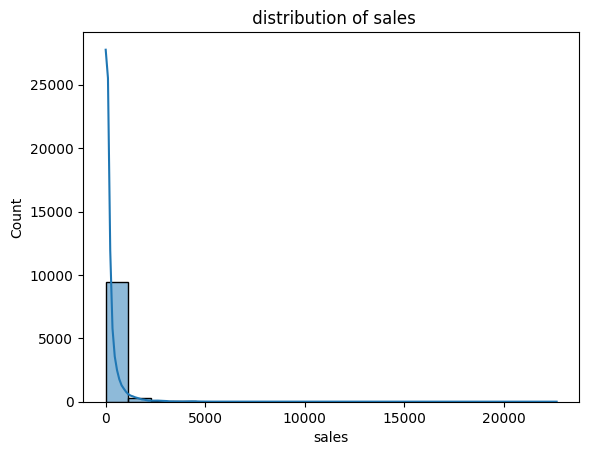

In [13]:
sns.histplot(df['sales'],bins = 20,kde=True)
plt.title(" distribution of sales")

plt.show()

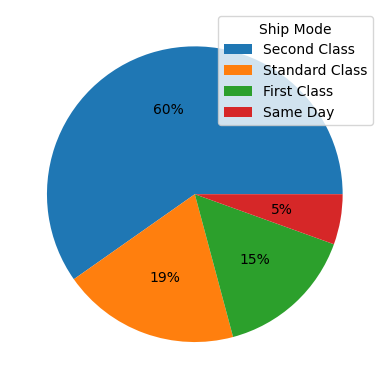

In [18]:
plt.pie(df['ship_mode'].value_counts(),autopct='%.0f%%')
plt.legend(df['ship_mode'].unique(), title='Ship Mode', loc='upper right')


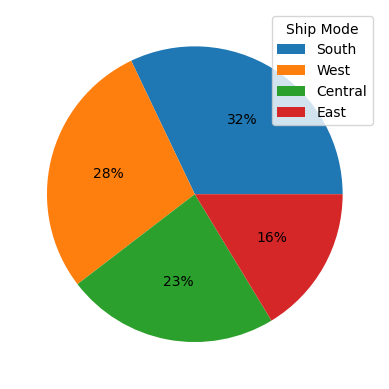

In [19]:
plt.pie(df['region'].value_counts(),autopct='%.0f%%')
plt.legend(df['region'].unique(), title='Ship Mode', loc='upper right')

In [16]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')

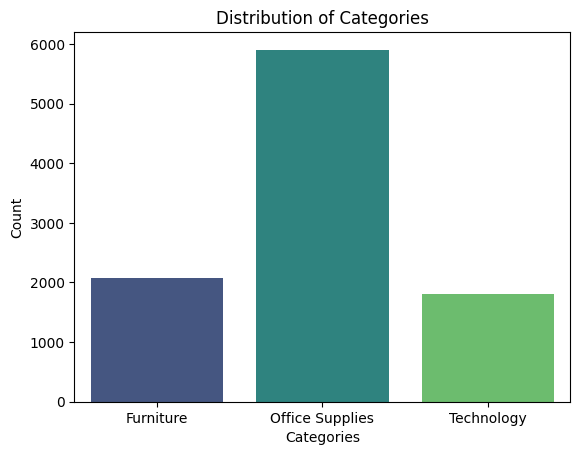

In [27]:
sns.countplot(x='category', data=df, palette='viridis')


plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()


# **Bivariate variables**

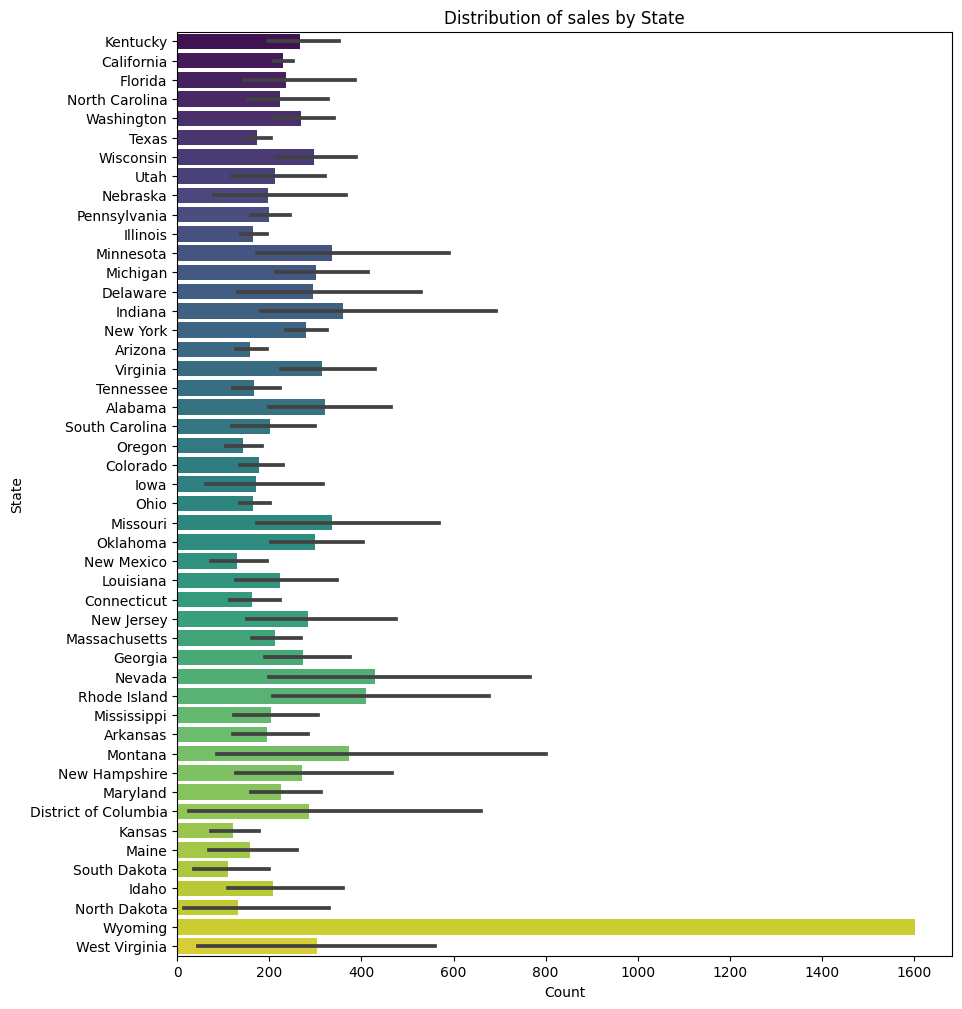

In [38]:
plt.figure(figsize=(10, 12))
sns.barplot(x='sales', y='state', data=df, palette='viridis')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of sales by State')

# Show the plot
plt.show()

**Timely plots**

In [41]:
df['years'] = df['order_date'].dt.year
df['months'] = df['order_date'].dt.month

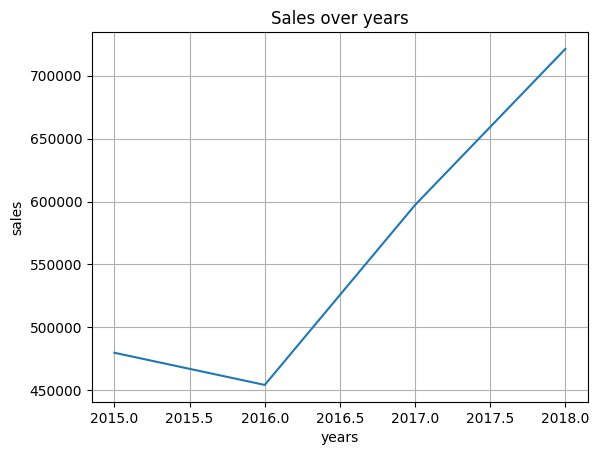

In [45]:
data_year = df.groupby('years').agg({'sales':'sum'}).reset_index()
sns.lineplot(x='years',y='sales',data = data_year)
plt.title("Sales over years")
plt.grid(True)
plt.show()

In [47]:
df.sample(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,years,months
7713,7714,CA-2018-139353,2018-10-28,2018-10-30,Second Class,JM-15250,Janet Martin,Consumer,United States,Fayetteville,North Carolina,28314.0,South,OFF-PA-10000300,Office Supplies,Paper,Xerox 1936,47.952,2018,10
2717,2718,CA-2015-100006,2015-07-09,2015-09-13,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,New York,10024.0,East,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT,377.970,2015,7
7441,7442,CA-2016-120446,2016-11-16,2016-11-18,First Class,JG-15805,John Grady,Corporate,United States,San Diego,California,92105.0,West,OFF-LA-10003148,Office Supplies,Labels,Avery 51,18.900,2016,11
7490,7491,CA-2016-108672,2016-10-09,2016-09-16,Standard Class,FA-14230,Frank Atkinson,Corporate,United States,Los Angeles,California,90032.0,West,FUR-FU-10003799,Furniture,Furnishings,"Seth Thomas 13 1/2"" Wall Clock",106.680,2016,10
3703,3704,CA-2016-104941,2016-06-13,2016-06-19,Standard Class,DH-13075,Dave Hallsten,Corporate,United States,Decatur,Alabama,35601.0,South,OFF-BI-10001249,Office Supplies,Binders,Avery Heavy-Duty EZD View Binder with Locking ...,19.140,2016,6


<Axes: xlabel='sub-category', ylabel='sales'>

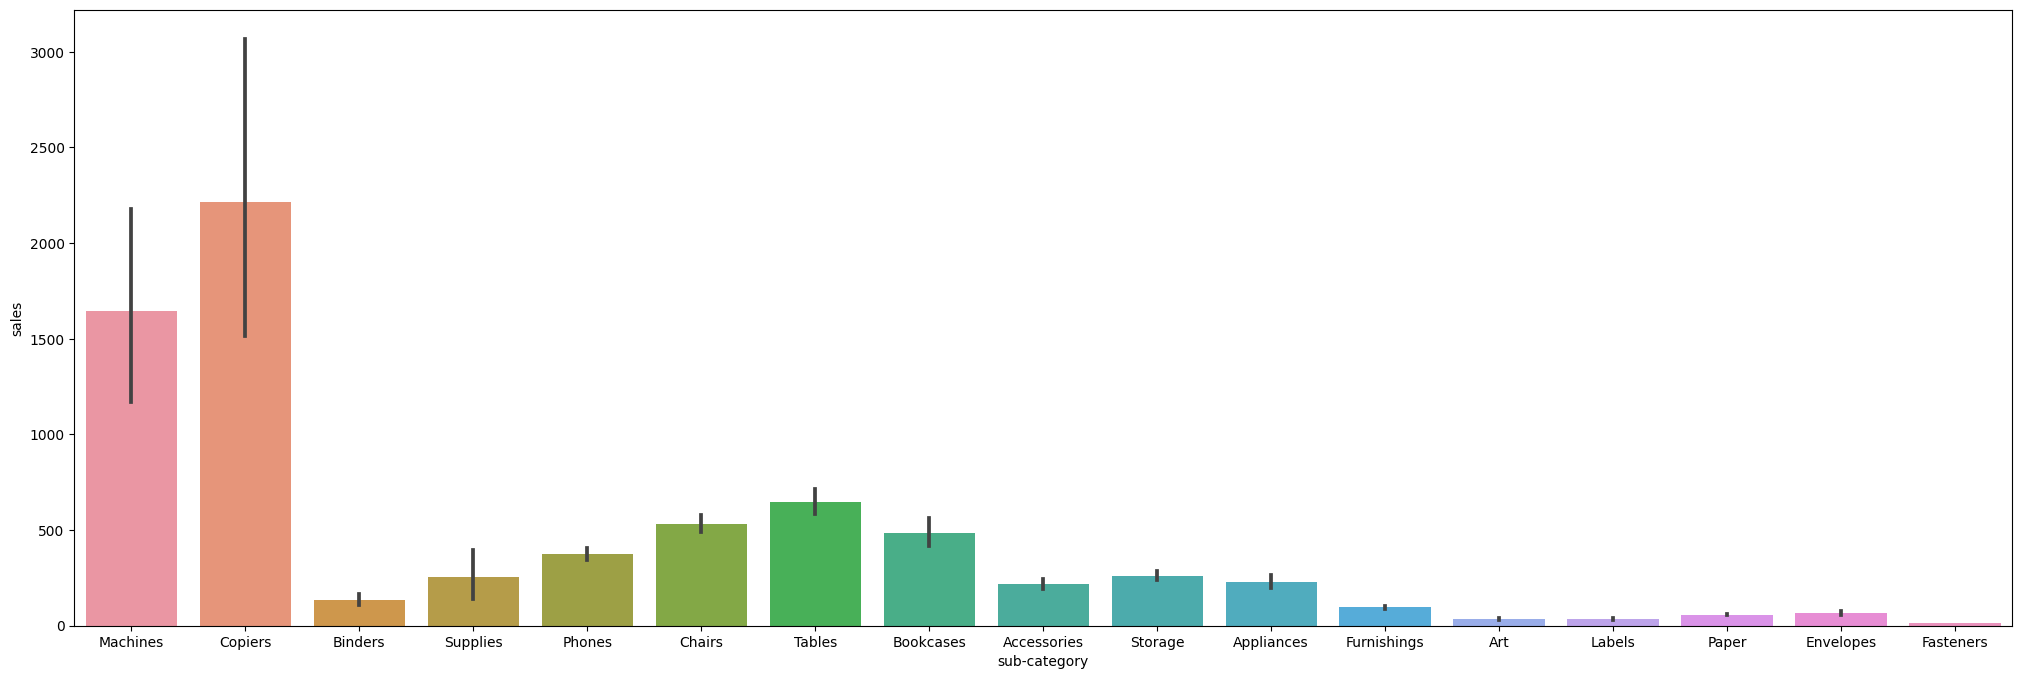

In [60]:
df_sorted = df.sort_values('sales', ascending=False)

plt.figure(figsize=(25, 8))
sns.barplot(x='sub-category', y='sales', data=df_sorted)

In [65]:
df['segment'].value_counts()

Consumer       5096
Corporate      2948
Home Office    1745
Name: segment, dtype: int64

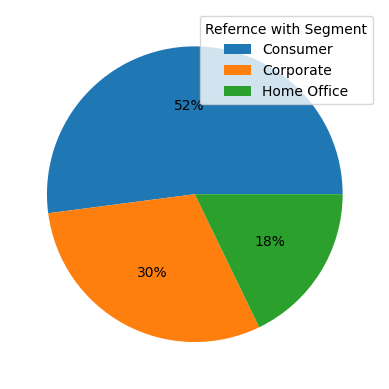

In [68]:
plt.pie(df['segment'].value_counts(),autopct='%.0f%%')
plt.legend(df['segment'].unique(), title='Refernce with Segment', loc='upper right')